In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import numpy as np

In [3]:
from keras.datasets import mnist

(x_train,y_train) , (x_test,y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


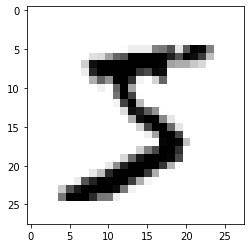

In [4]:
single_image = x_train[0]
plt.imshow(single_image,cmap='gray_r')

In [5]:
## Data Preprocessing and normalizing the data between 0 and 1
x_train = x_train.reshape(60000,784)
x_train = x_train/255
x_test = x_test.reshape(10000,784)
x_test = x_test/255

In [6]:
from sklearn.preprocessing import StandardScaler


In [7]:
s = StandardScaler()


In [9]:
x_train = s.fit_transform(x_train)
x_test  = s.fit_transform(x_test)

## Kernel SVM-Polynomial:

In [10]:
from sklearn.svm import SVC 

In [11]:
model = SVC(C=1,kernel='poly')

In [12]:
model.fit(x_train,y_train)

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [13]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [14]:
predictions = model.predict(x_test)

In [15]:
print("\nTesting Accuracy = ", accuracy_score(y_true=y_test, y_pred=predictions))


Testing Accuracy =  0.9611


In [16]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.95      0.96      1032
           3       0.97      0.96      0.97      1010
           4       0.94      0.97      0.95       982
           5       0.97      0.97      0.97       892
           6       0.97      0.96      0.97       958
           7       0.98      0.93      0.95      1028
           8       0.89      0.97      0.93       974
           9       0.95      0.94      0.94      1009

    accuracy                           0.96     10000
   macro avg       0.96      0.96      0.96     10000
weighted avg       0.96      0.96      0.96     10000



In [17]:
print(confusion_matrix(y_test,predictions))

[[ 962    0    0    1    0    3    4    0   10    0]
 [   0 1122    3    0    2    1    4    0    3    0]
 [   6    0  977    4    2    0    2    6   35    0]
 [   0    0    0  972    0    4    2    5   21    6]
 [   0    0    2    0  952    0    7    2    5   14]
 [   2    1    2    4    2  862    7    1    9    2]
 [   4    3    1    0   10    7  920    0   13    0]
 [   1    9   11    2   13    0    0  956   10   26]
 [   1    0    3    7    4    7    2    2  944    4]
 [   3    4    1   12   27    3    0    3   12  944]]


## Kernel SVM-Polynomial with PCA

In [18]:
x_train_PCA = x_train
x_test_PCA = x_test

In [19]:
## Applying PCA on the Dataset
from sklearn.decomposition import PCA

In [20]:
pca = PCA(n_components=0.97)        # Should lie between 0.95 to 0.99
x_train_PCA = pca.fit_transform(x_train_PCA)  
x_test_PCA = pca.transform(x_test_PCA)

In [22]:
model_PCA = SVC(C=1,kernel='poly')

In [23]:
model_PCA.fit(x_train_PCA,y_train)

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [24]:
predictions_PCA = model_PCA.predict(x_test_PCA)

In [25]:
print("\nTesting Accuracy = ", accuracy_score(y_true=y_test, y_pred=predictions_PCA))


Testing Accuracy =  0.9624


In [26]:
print(classification_report(y_test,predictions_PCA))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.97      0.95      0.96      1032
           3       0.97      0.96      0.97      1010
           4       0.94      0.97      0.96       982
           5       0.97      0.97      0.97       892
           6       0.97      0.96      0.97       958
           7       0.98      0.93      0.96      1028
           8       0.90      0.97      0.93       974
           9       0.95      0.94      0.94      1009

    accuracy                           0.96     10000
   macro avg       0.96      0.96      0.96     10000
weighted avg       0.96      0.96      0.96     10000



In [27]:
print(confusion_matrix(y_test,predictions_PCA))

[[ 963    0    0    1    0    3    4    0    9    0]
 [   0 1122    3    0    2    1    4    0    3    0]
 [   3    0  982    3    2    1    2    7   32    0]
 [   0    0    1  972    0    4    2    5   20    6]
 [   0    0    3    0  954    0    7    2    4   12]
 [   2    1    2    5    2  862    7    1    8    2]
 [   4    2    1    0   10    7  921    0   13    0]
 [   1    9   12    2   11    0    0  960    7   26]
 [   1    0    3    7    4    7    2    2  944    4]
 [   2    4    1   12   26    4    0    4   12  944]]


## Kernel SVM-Polynomial with LDA

In [28]:
x_train_LDA = x_train
x_test_LDA = x_test

In [29]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [30]:
lda = LDA(n_components=9)
x_train_LDA = lda.fit_transform(x_train_LDA,y_train)  
x_test_LDA = lda.transform(x_test_LDA)

In [31]:
model_LDA = SVC(C=1,kernel='poly')

In [34]:
model_LDA.fit(x_train_LDA,y_train)

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [35]:
predictions_LDA = model_LDA.predict(x_test_LDA)

In [36]:
print("\nTesting Accuracy = ", accuracy_score(y_true=y_test, y_pred=predictions_LDA))


Testing Accuracy =  0.9088


In [37]:
print(classification_report(y_test,predictions_LDA))

              precision    recall  f1-score   support

           0       0.96      0.97      0.96       980
           1       0.96      0.96      0.96      1135
           2       0.92      0.90      0.91      1032
           3       0.88      0.89      0.88      1010
           4       0.92      0.92      0.92       982
           5       0.84      0.87      0.86       892
           6       0.95      0.93      0.94       958
           7       0.93      0.90      0.91      1028
           8       0.81      0.87      0.84       974
           9       0.90      0.89      0.89      1009

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



In [38]:
print(confusion_matrix(y_test,predictions_LDA))

[[ 947    0    1    4    1   11    5    3    8    0]
 [   0 1093    5    5    1    3    1    0   27    0]
 [   6    5  929   16   12    8   13    7   35    1]
 [   3    0   18  895    0   41    1   13   33    6]
 [   0    1    9    0  902    1    9    5   17   38]
 [   7    2    6   43    6  776    4    7   38    3]
 [  10    3   12    0    9   27  887    0   10    0]
 [   1   10   19   17    7    5    0  921    6   42]
 [   6   19    9   24   10   39    9    7  845    6]
 [   6    0    2   16   35    8    0   23   26  893]]
